In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp
%matplotlib inline

In [2]:
blotch = pd.read_csv("C:\Users\Zade\Desktop\HonorsMaterials\ForTask1\p4_analysis\P4_catalog_v1.0\P4_catalog_v1.0_L1C_cut_0.5_blotch_meta_merged.csv")

In [3]:
blotch.head()#check that it loaded

,angle,tile_id,image_x,image_y,marking_id,n_votes,obsid,radius_1,radius_2,vote_ratio,...,y_angle,l_s,north_azimuth,map_scale,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,PlanetocentricLatitude,PlanetographicLatitude,PositiveEast360Longitude
0,2.28,APF0000cia,3330.27,5573.00,B000000,4,ESP_012079_0945,22.13,15.78,1.00,...,0.10,214.785,126.856883,1.0,-67.239204,257.001479,-3370.630963,-85.493625,-85.546304,104.661641
1,1.38,APF0000cia,3593.60,5706.40,B000001,5,ESP_012079_0945,25.55,15.73,0.55,...,0.05,214.785,126.856883,1.0,-67.166591,257.008699,-3370.633997,-85.493821,-85.546498,104.646095
2,7.16,APF0000cic,98.10,34394.70,B000004,10,ESP_012079_0945,84.54,48.33,1.00,...,0.18,214.785,126.856883,1.0,-65.402430,263.908435,-3370.353988,-85.387847,-85.441752,103.918757
3,81.00,APF0000cic,825.58,34203.38,B000005,8,ESP_012079_0945,51.92,35.12,1.00,...,0.97,214.785,126.856883,1.0,-65.252200,263.799557,-3370.366324,-85.390258,-85.444136,103.893534
4,14.66,APF0000cic,152.67,34155.33,B000006,3,ESP_012079_0945,184.94,71.25,1.00,...,0.25,214.785,126.856883,1.0,-65.411364,263.848868,-3370.358955,-85.388794,-85.442688,103.923605


In [4]:
fans = pd.read_csv("C:\Users\Zade\Desktop\HonorsMaterials\ForTask1\p4_analysis\P4_catalog_v1.0\P4_catalog_v1.0_L1C_cut_0.5_fan_meta_merged.csv")

In [5]:
#run this again after loading blotch, fans in- testing combining data
mixed = pd.concat([blotch, fans])

In [6]:
group_fan = fans.groupby("obsid")
group_blotch = blotch.groupby("obsid")
fcl = group_fan.marking_id.count()
bcl = group_blotch.marking_id.count()
#keys are obsids, values are the data frames for each object (n_votes, radii, l_s, etc)

In [7]:
#visualizing the data frames
#for obsid, obsid_df in group_fan:
#    print(obsid)
#    print(obsid_df)

In [8]:
#visualizing the data frames
#group_fan.get_group('ESP_011296_0975').head

In [9]:
#bcl.loc['ESP_011296_0975'] 

In [10]:
#group_fan.describe()

In [11]:
fcl.head()

obsid
ESP_011296_0975    4496
ESP_011341_0980     455
ESP_011348_0950       4
ESP_011350_0945    1117
ESP_011351_0945    1647
Name: marking_id, dtype: int64

In [12]:
bcl.head()

obsid
ESP_011296_0975    1026
ESP_011341_0980     283
ESP_011348_0950     197
ESP_011350_0945     628
ESP_011351_0945    1177
Name: marking_id, dtype: int64

In [13]:
group_mix = mixed.groupby('obsid')
mcl = group_mix.marking_id.count()

In [14]:
mcl.head()

obsid
ESP_011296_0975    5522
ESP_011341_0980     738
ESP_011348_0950     201
ESP_011350_0945    1745
ESP_011351_0945    2824
Name: marking_id, dtype: int64

In [15]:
print mcl.values.max()
print mcl.values.min()

20925
21


In [16]:
littlemix=mixed.head

In [17]:
fans.pivot(index='marking_id', columns='obsid', values='l_s') 
#littlemix.pivot(index='marking_id', columns='obsid', values='l_s') #this line doesn't work, would be nice to make smaller data
#to test pivoting 

ValueError: Index contains duplicate entries, cannot reshape

In [18]:
littlemix.pivot(index='marking_id', columns='obsid', values='l_s') #this line doesn't work, would be nice to make smaller data
#to test pivoting 

AttributeError: 'function' object has no attribute 'pivot'

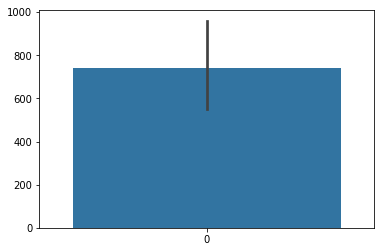

In [25]:
sns.barplot(data = fcl) #how to make this useful

In [19]:
print mcl.index[0]
print mcl.values[0]

ESP_011296_0975
5522


In [20]:
oldmcl=group_mix.l_s.count()

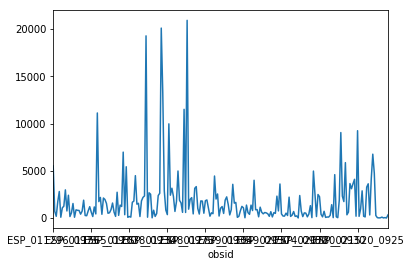

In [21]:
oldmcl[0:].plot()#plot of obsid vs #obj/l_s

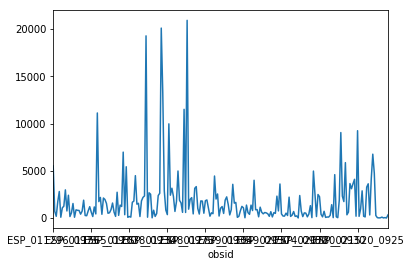

In [22]:
mcl[0:].plot() #plot of markingID vs #of objects total

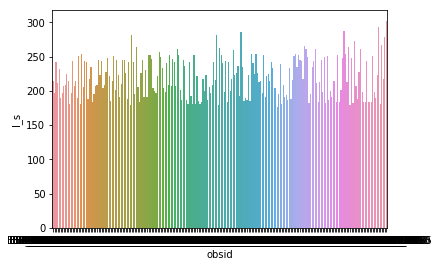

In [23]:
sns.barplot(x = 'obsid', y='l_s', data = mixed)

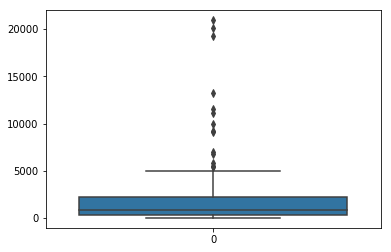

In [24]:
sns.boxplot(data = mcl)

In [ ]:
sns.barplot(x = 'marking_id', y='l_s', data = fans)  #takes too long to run, but line 23 runs fine- why?